# Introduction
Customer segmentation is always the fascinating problem for every business. For the retailer, they will want to understand the  shopping behavior of their customer so that they could have the better strategies for each group of customer. Therefore, more companies have been interested in analyzing and clustering their customers in order to market the new products to exact the customer who needs.

In this project, I will introduce the most common technique in segmentation is cluster analysis. This help us explore the similarity between each customer and then group them as the same cluster who share the same behavior

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("D:\project\marketing_campaign.csv",sep="\t")

In [3]:
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

The dataset in this project was downloaded from Kaggle. It contains information of 2240 customers, which their information about birthday, or income. Moreover, the dataset also includes their responses to previous promotion or number of times they bought items on company's website.
1. *People*
* **ID**: Customer's unique identifier
* **Year_Birth**: Customer's birth year
* **Education**: Customer's education level
* **Marital_Status**: Customer's marital status
* **Income**: Customer's yearly household income
* **Kidhome**: Number of children in customer's household
* **Teenhome**: Number of teenagers in customer's household
* **Dt_Customer**: Date of customer's enrollment with the company
* **Recency**: Number of days since customer's last purchase
* **Complain**: 1 if the customer complained in the last 2 years, 0 otherwise

2. *Products*
* **MntWines**: Amount spent on wine in last 2 years
* **MntFruits**: Amount spent on fruits in last 2 years
* **MntMeatProducts**: Amount spent on meat in last 2 years
* **MntFishProducts**: Amount spent on fish in last 2 years
* **MntSweetProducts**: Amount spent on sweets in last 2 years
* **MntGoldProds**: Amount spent on gold in last 2 years

3. *Promotion*
* **NumDealsPurchases**: Number of purchases made with a discount
* **AcceptedCmp1**: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* **AcceptedCmp2**: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* **AcceptedCmp3**: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* **AcceptedCmp4**: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* **AcceptedCmp5**: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* **Response**: 1 if customer accepted the offer in the last campaign, 0 otherwise

4. *Place*
* **NumWebPurchases**: Number of purchases made through the company’s website
* **NumCatalogPurchases**: Number of purchases made using a catalogue
* **NumStorePurchases**: Number of purchases made directly in stores
* **NumWebVisitsMonth**: Number of visits to company’s website in the last month

# Data cleaning

In [5]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

There are only 24 missing values in Income feature. We deal with this by converting NA values into responding income to education

In [6]:
education_income=df.groupby(['Education'])['Income'].mean().reset_index()
education_income

,Education,Income
0,2n Cycle,47633.190000
1,Basic,20306.259259
2,Graduation,52720.373656
3,Master,52917.534247
4,PhD,56145.313929


In [7]:
for i in df.Education.unique():
    education_income=df.groupby(['Education'])['Income'].mean().reset_index()
    df.loc[(df.Education==i),"Income"]=df.loc[(df.Education==i),"Income"].fillna(education_income.loc[(education_income.Education==i),"Income"].item())

We add a new feature, which is age, based on the year of birth of customers

In [8]:
#Find age
import datetime
today = datetime.datetime.now()
df['Age']=today.year-df['Year_Birth']

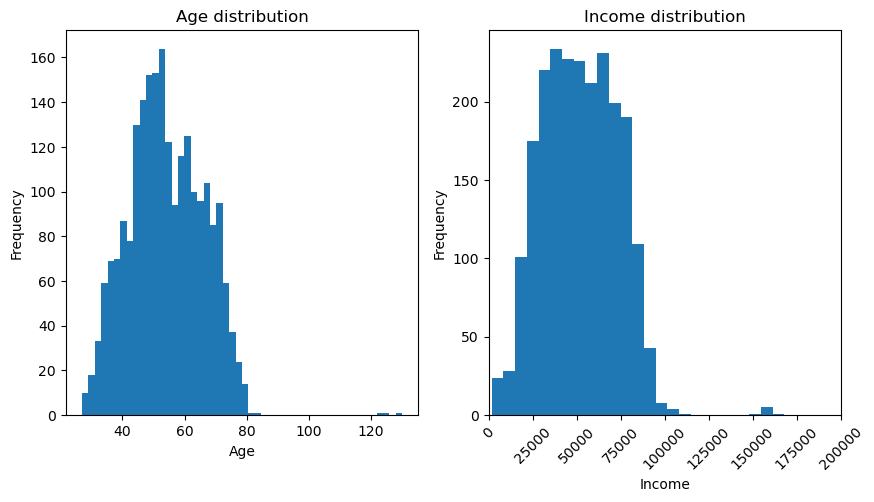

In [9]:
f,a = plt.subplots(1,2,figsize=(10,5))
a[0].hist(df.Age,bins=50,histtype ='bar')
a[0].set_title("Age distribution")
a[0].set_xlabel("Age")
a[0].set_ylabel("Frequency")
a[1].hist(df.Income,bins=100,histtype ='bar')
a[1].set_title("Income distribution")
a[1].set_xlabel("Income")
a[1].set_ylabel("Frequency")
a[1].tick_params(axis="x",labelrotation=45)
plt.xlim(0,200000)
None

We figure out there are some unusual age. Therefore, we will eliminate every customer that aged higher than 100

In [10]:

#Drop outlier in age
df.drop(df.loc[(df.Age>100)].index.tolist(),inplace=True)

# Preprocessing
From the member registration day, I add the column Year_Loyalty to know how long the customer have been the customer at the market

In [11]:
#Number of year shoopping at mall
df["Dt_Customer"]=pd.to_datetime(df['Dt_Customer'])
df['Year_Loyalty']=today.year-df['Dt_Customer'].dt.year.astype("int32")

  Marital_Status  Complain
0         Absurd         2
1          Alone         3
2       Divorced       231
3        Married       864
4         Single       479
5       Together       579
6          Widow        77
7           YOLO         2


<AxesSubplot:xlabel='Marital_Status', ylabel='Complain'>

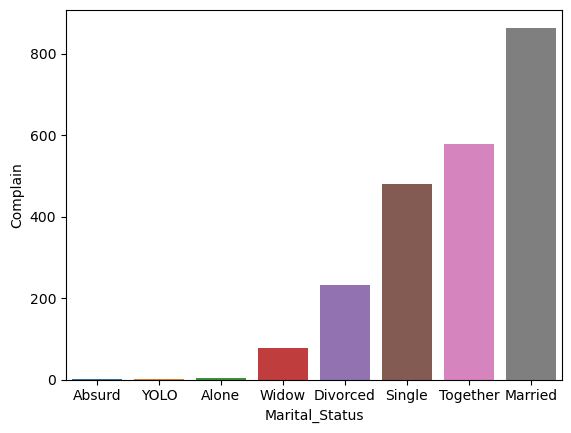

In [12]:
a=df.groupby(['Marital_Status'])['Complain'].count().reset_index()
print(a)
sns.barplot(data=a,x="Marital_Status",y="Complain",
           order=a.sort_values("Complain").Marital_Status)

We divide the categories in martial status into two new groups: Single or Taken

In [13]:
#hange value in Martial status
status={"Together":"Taken","Married":"Taken","Divorced":"Single","Widow":"Single",
       "Alone":"Single","Absurd":"Single","YOLO":"Single"}
df['Marital_Status']=df['Marital_Status'].replace(status)


From the information of kids at home and teenagers at home, we find out the number of children that the customer has. 

In [14]:
#Add new feature number of kid
df['Number_Kids']=df['Kidhome']+df['Teenhome']

The store has had many marketing campaigns in last 2 years, but not all the customer responded to it. Therefore, we add the new column that shows the total response of customer to these campaigns.

In [15]:
#add new feature number of accepting campaign
df['Accepted_Campaigns']=df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']

To now the number of purchases of customer is the good way to analyze the customer behaviors

In [16]:
#Total purchase 
df['Purchase']=df['NumDealsPurchases']+df['NumWebPurchases']+df['NumCatalogPurchases'] 

Finally, besides purchases, we also want to know total spendings of customer in the last 2 years in every kind of product.

In [17]:
#Total spending
df['Spending']=df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']
+df['MntSweetProducts']+df['MntGoldProds']

0       176
1         7
2        63
3         8
4        42
       ... 
2235    365
2236      8
2237     36
2238     91
2239     22
Length: 2237, dtype: int64

After handling our dataset, I will drop the unnecessary columns, and I also create dummy variables for categorical columns

In [18]:
df=df.drop(['Year_Birth','Dt_Customer',"ID","Z_CostContact", "Z_Revenue",'Kidhome',"Teenhome"],axis=1)

Before moving forward, I will take a copy of the data to be used later in the analysis part. 

In [19]:
df_copy=df.copy()


In this step, I create the dummy variables for the categorical column

In [20]:
df=pd.get_dummies(data=df,columns=['Education',
 'Marital_Status'])

In [21]:
from sklearn.cluster import AgglomerativeClustering,KMeans
from sklearn.preprocessing import StandardScaler

Before applying clustering methods, we will scale and then apply PCA to reduce the dimensionality of dataset.

# Scale dataset

In [22]:
#Scale data
scale=StandardScaler()
X_scale=scale.fit_transform(df)


# Dimensionality reduction

In [23]:
from sklearn.decomposition import PCA

pca=PCA(n_components=0.95,random_state=40).fit(X_scale)

X_pca = pd.DataFrame(pca.transform(X_scale))

# Find the optimal number of k

One of the disadvantage of k-means method is that we do not know exactly how many clusters needed for our model. In k-means, the most common way to assess how good the model is their inertia: this is the mean squared distance between each instance and its closest centroid. However, we can not say that the k-cluster gives smallest inertia will be the best number of k. Since the more centroids the model have, the more smaller distance between instance to its closest centroid. 

To solve this problem, elbow rule was suggested to find the optimal k, where we will choose the point at the elbow. This elbow is between the big drop in responding inertia to k-th cluster and the slow decrese of inertia.

In [24]:
kmeans_per_k=[KMeans(n_clusters=k,random_state=30).fit(X_pca)
             for k in range(1,10)]
inertias=[model.inertia_ for model in kmeans_per_k]


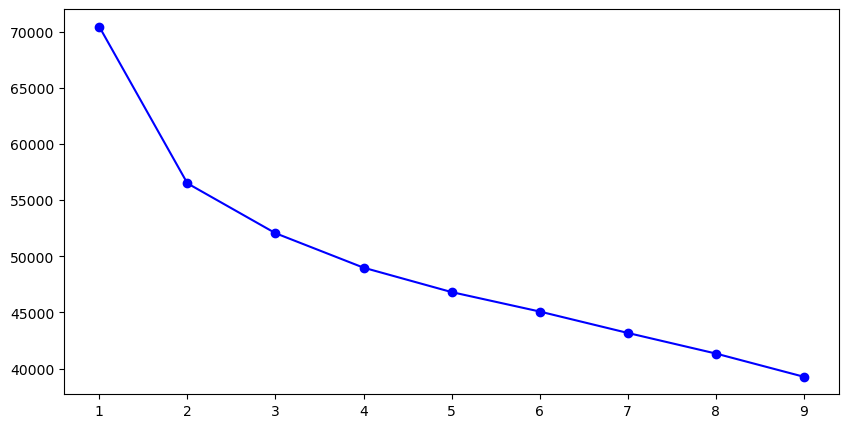

In [25]:
plt.figure(figsize=(10,5))
plt.plot(range(1,10),inertias,"bo-")

The plot above is the elbow method. However, it is hard to see the exact elbow point based on this plot. 

Therefore, the more precise approach is to use silhouette score technique, which is the mean silhouette coefficient over all the instances. The silhouette coefficient can vary between -1 and +1: a coefficient close to +1 means that the instance is well inside its own cluster and far from other clusters,
while a coefficient close to 0 means that it is close to a cluster boundary, and finally a
coefficient close to -1 means that the instance may have been assigned to the wrong
cluster.

In [26]:
from sklearn.metrics import silhouette_score


In [27]:
silhouette_scores = [silhouette_score(X_pca, model.labels_)
                     for model in kmeans_per_k[1:]]


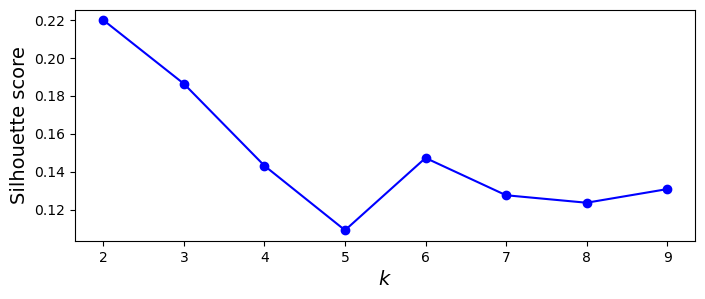

In [28]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)

plt.show()

This shows that the best k-th clsuter is 2, where it gains the highest silhouette ratio, k=3 is also the good choice for our model.

Moreover, we can use the silhouette diagram to choose the optimal k number.

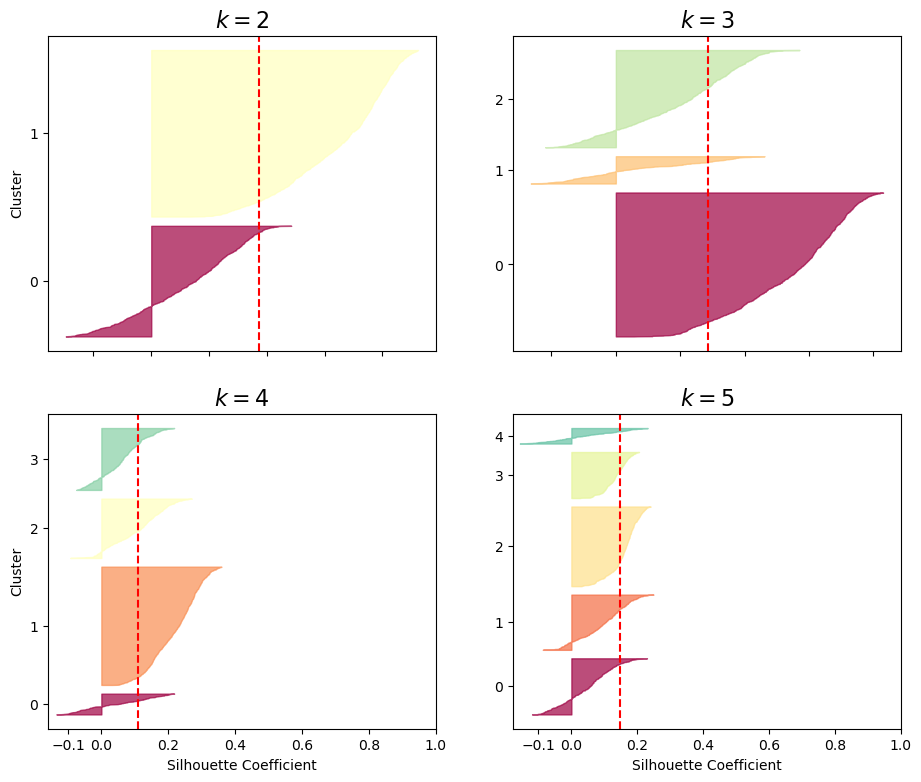

In [29]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl
plt.figure(figsize=(11, 9))

for k in (2, 3, 4, 5):
    plt.subplot(2, 2,k-1)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X_pca, y_pred)

    padding = len(X_pca) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (2, 4):
        plt.ylabel("Cluster")
    
    if k in (4, 5):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 1], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

The dashline from the diagram shows how well the cluster, if any coefficient below this line implies that the instances in that cluster is too close to other clusters.

From the prvious plot, we assume k=2 is the optimal cluster since it's highest silhouette coefficient. However, the diagram shows that only cluster 1 is good but cluser 0 is not very well. Therefore, we can choose the k=3 or k=4. In this case, I will choose k=3 for the number of cluster.


# K-Means with k=3


In [85]:
kmeans=KMeans(n_clusters=3,random_state=32).fit(X_pca)
df_copy['label']=kmeans.predict(X_pca)
df['label']=kmeans.predict(X_pca)

<AxesSubplot:xlabel='label', ylabel='count'>

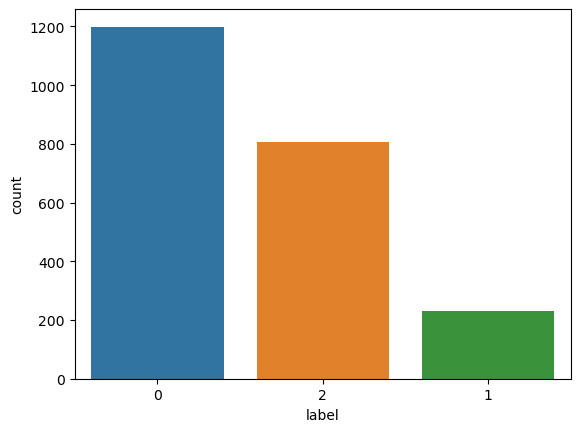

In [86]:
sns.countplot(data=df_copy,x="label",order=df_copy['label'].value_counts().index)

We see that the majority of customer was clustered as cluster 2, while just around 210 customers are considered as group 0. Our job now is to analyze the behavior of each group to understand the characteristic of each cluster.
# Data analysis

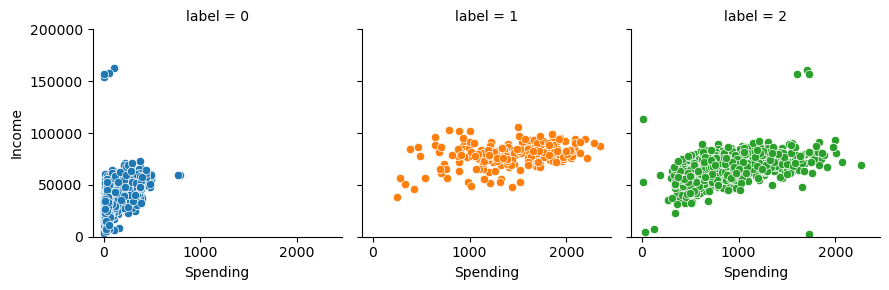

In [32]:

g=sns.FacetGrid(df_copy,col="label",hue='label'
               )
g.map(sns.scatterplot,"Spending","Income")
g.set(ylim=(0,200000))


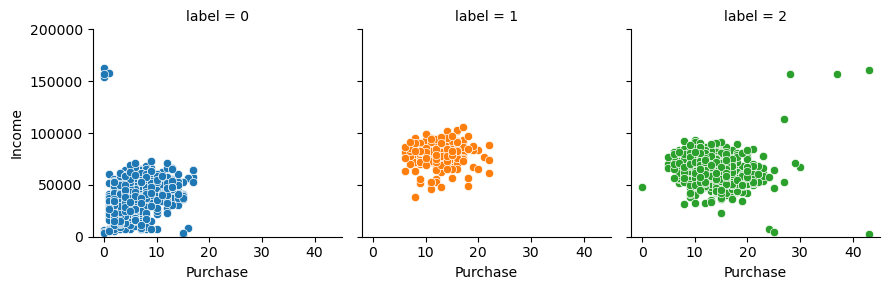

In [33]:

g=sns.FacetGrid(df_copy,col="label",hue='label'
               )
g.map(sns.scatterplot,"Purchase","Income")
g.set(ylim=(0,200000))


In [34]:
df_copy.groupby(['label'])['Income','Spending',"Purchase"].mean()

,Income,Spending,Purchase
label,,,
0,37198.595763,111.260217,5.500417
1,79370.388181,1440.430435,12.652174
2,66845.776386,905.243812,13.365099


We know that group 0 accounts for the majority of customer. However, from the plot above, the total spending and purchase of group 0 is the lowest compared to other groups. Furthermore, the average income of customer in group 0 also the lowest, only $\$37198$. While the average income of customers in group 1 and group 2 two times higher than income of group 0 ($\$79370$ and $\$66845$ respectively)

It can be seen that half of total spending  in group 2 is below $\$1000$ in the last 2 years, while the majority of customer in group 1 spent more than $\$1000$ for different products. 

For the number of purchases in the last 2 years, there were no customer in group 0 has more than 20 purchases while the number of purchase in group 2 varies between 8 and 25. Moreover, the same trend can also be seen in group 2, but there are some extremely high number of purchase in group 2, which is higher than 30 purchase in total in the last 2 years

Age distribution of group 0 is:
The average age of group 0 is below 52.42
25% of customer's age of group 0 is below 45.0
50% of customer's age of group 0 is below 51.0
75% of customer's age of group 0 is below 60.0 

Age distribution of group 1 is:
The average age of group 1 is below 53.70
25% of customer's age of group 1 is below 42.0
50% of customer's age of group 1 is below 53.0
75% of customer's age of group 1 is below 65.0 

Age distribution of group 2 is:
The average age of group 2 is below 56.70
25% of customer's age of group 2 is below 48.0
50% of customer's age of group 2 is below 57.0
75% of customer's age of group 2 is below 66.0 



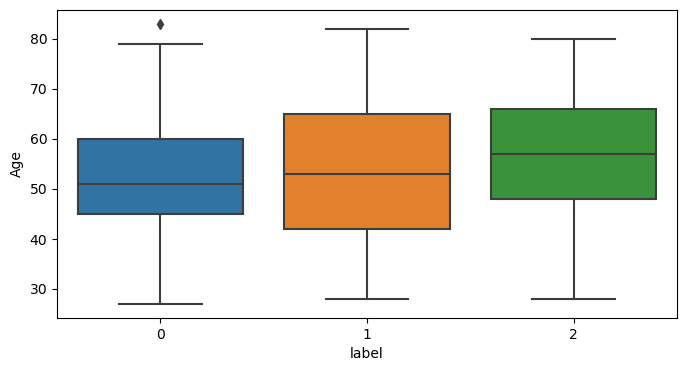

In [35]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df_copy,x="label", y="Age", orient='v')
for i in range(0,3):
    print("Age distribution of group",i,"is:")
    print("The average age of group",i,"is below {:.2f}".format(df_copy.loc[(df_copy.label==i),'Age'].mean()))
    print("25% of customer's age of group",i,"is below",df_copy.loc[(df_copy.label==i),'Age'].quantile(0.25))
    print("50% of customer's age of group",i,"is below",df_copy.loc[(df_copy.label==i),'Age'].quantile(0.5))
    print("75% of customer's age of group",i,"is below",df_copy.loc[(df_copy.label==i),'Age'].quantile(0.75),"\n")

The result shows that customer age of group 0 is lower than other groups. Moreover, 75% of customer's age of group 0 is below 60.0 while responding age for group 1 and 2 is 65 and 66.

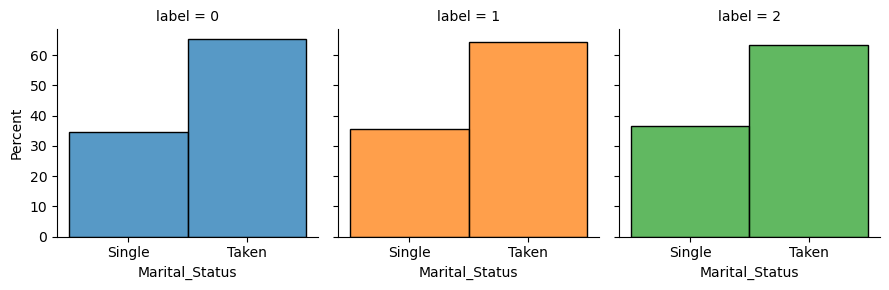

In [36]:
g=sns.FacetGrid(data=df_copy,col='label',hue='label')
g.map(sns.histplot,"Marital_Status",stat="percent")
None

The same pattern can be seen from three groups, where most of the customers is living with their partner. Therefore, there is no difference in the marital status of each group

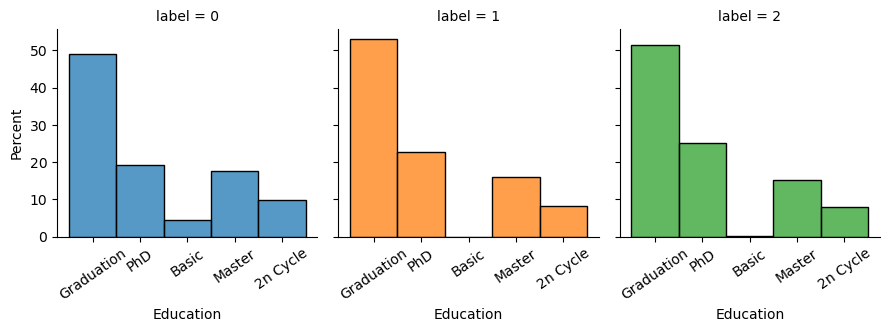

In [37]:
g=sns.FacetGrid(data=df_copy,col='label',hue='label')
g.map(sns.histplot,"Education",stat="percent")
g.set_xticklabels(rotation=35)
None

University graduate accounts for the majority in three classes, followed by PHD customers. 

In the group 0, the third group is master, which is just a little bit lower than PHD graduates. On the other hand, Master's degree customers in other two groups is much lower than PHD compared to the group 0. 

Especially, in group 1 and 2, all the customer graduated from the university, while around $5\%$ customer in group 0 just finished high-school.

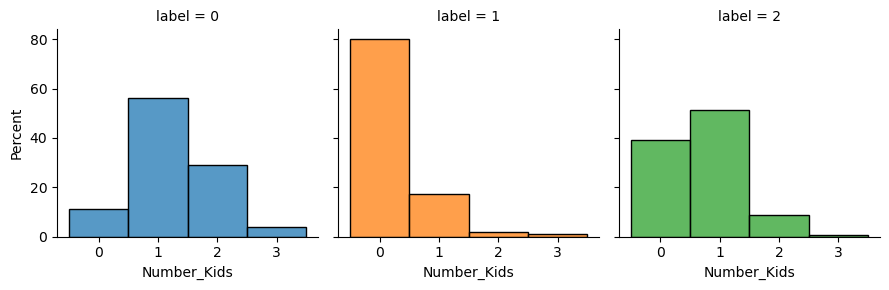

In [38]:
g=sns.FacetGrid(data=df_copy,col='label',hue='label')
g.map(sns.histplot,"Number_Kids",stat="percent",discrete=True)
None

There are some major differences of number of children in three groups.

In the group 0, most of customer has one or two children. And around $2\%$ of customer has 3 kids. 

For group 1, nearly $80\%$ customer has no kids, while just the minority of customer only has children. 

Around $50\%$ customer in group 2 has one child, followed by no-kid customers with $40\%$



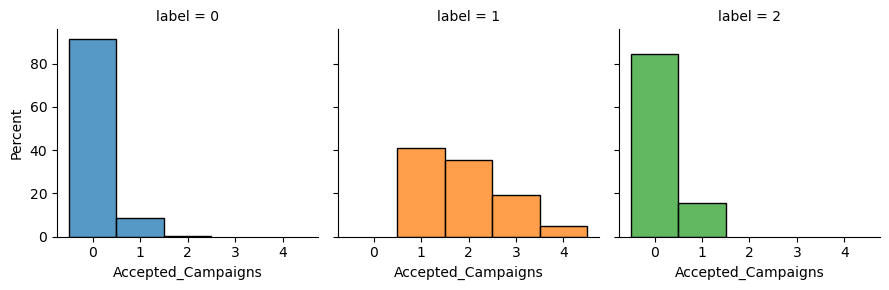

In [39]:
g=sns.FacetGrid(data=df_copy,col='label',hue='label')
g.map(sns.histplot,"Accepted_Campaigns",stat="percent",discrete=True)


While in group 0 and 2, most of customer never accepted any offer in any campaign, every customer in group 1 has accepted at least one offer from the company campaign. Moreover,  nearly $40\%$ customer responded to two campaigns and $10\%$ accepted offer from three campaigns.

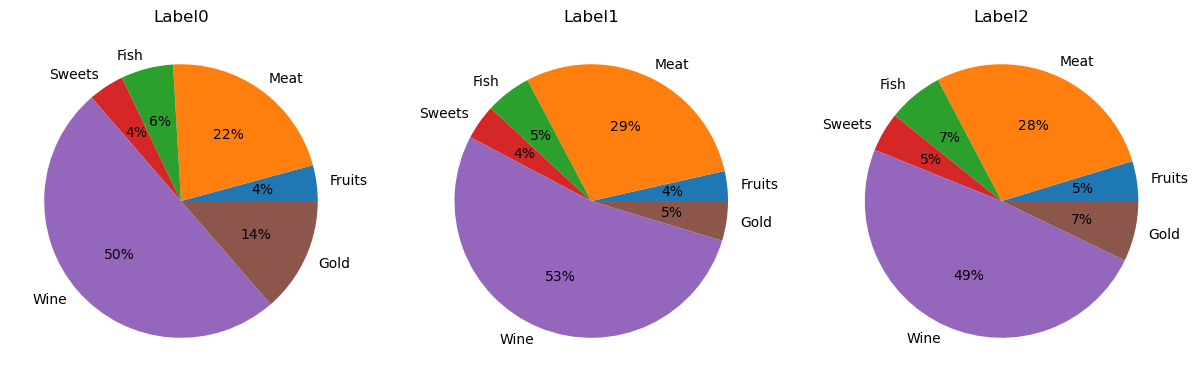

In [42]:
labels=['Fruits',"Meat","Fish","Sweets","Wine","Gold"]
plt.figure(figsize=(15,10))

for i in range(3):
    counts=[]
    d=df_copy[df_copy.label==i]
    counts.append(d['MntFruits'].sum())
    counts.append(d['MntMeatProducts'].sum())
    counts.append(d['MntFishProducts'].sum())
    counts.append(d['MntSweetProducts'].sum())
    counts.append(d['MntWines'].sum())
    counts.append(d['MntGoldProds'].sum())
    ax1=plt.subplot2grid((1,3),(0,i))
    ax1.set_title("Label"+str(i))
    plt.pie(x=counts,labels=labels,autopct='%.0f%%')

The plot above shows that wine is the most common product, where it accounted for a half of total spent amount in three groups. Meat is the second spending products in three groups with $22\%$, $29\%$ and $28\%$ respectively. 

However, the percentage of amount spending on meat products in group 0 is much lower than other groups because they spent more on gold ($14\%$) compared to other two groups.

Finally, customer in 3 groups spent the least on sweets, fish amd fruit products.

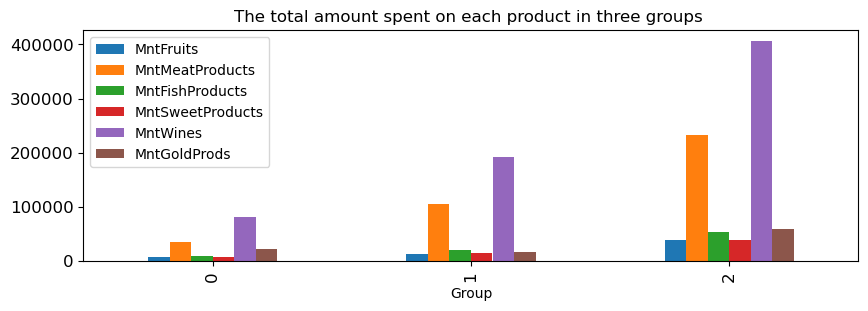

In [45]:
a=df_copy.groupby(['label'])['MntFruits',"MntMeatProducts","MntFishProducts","MntSweetProducts","MntWines","MntGoldProds"].sum().reset_index()
axes =a.plot.bar(x="label",y=['MntFruits',"MntMeatProducts","MntFishProducts","MntSweetProducts","MntWines","MntGoldProds"],
                title="The total amount spent on each product in three groups ",
                xlabel="Group",
                fontsize='large',figsize=(10,3))

None

In this bar chart, customer in group 2 spent more than other 2 groups on every product, especially  wine and meat products.

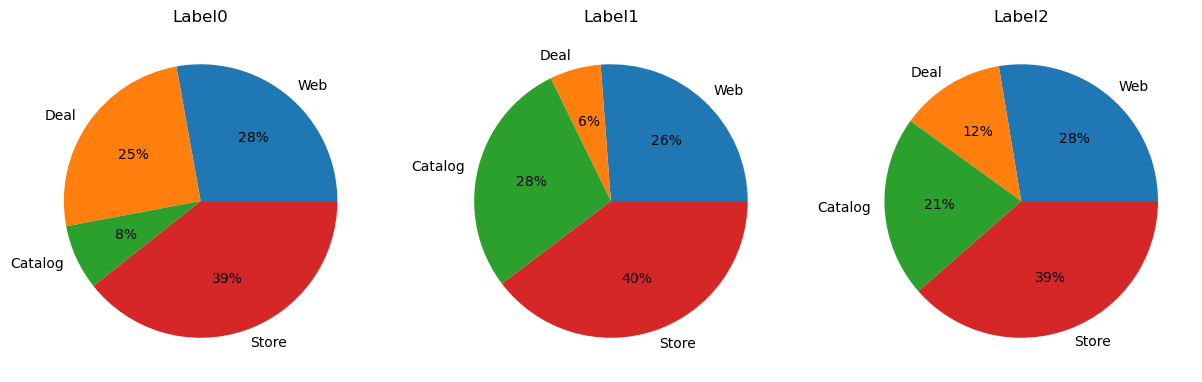

In [48]:
labels=['Web',"Deal","Catalog","Store"]
plt.figure(figsize=(15,10))

for i in range(3):
    counts=[]
    d=df_copy[df_copy.label==i]
    counts.append(d['NumWebPurchases'].sum())
    counts.append(d['NumDealsPurchases'].sum())
    counts.append(d['NumCatalogPurchases'].sum())
    counts.append(d['NumStorePurchases'].sum())
    ax1=plt.subplot2grid((1,3),(0,i))
    ax1.set_title("Label"+str(i))
    plt.pie(x=counts,labels=labels,autopct='%.0f%%')

The pie chart shows us some interesting insights of purchase behavior in each group.
* Most of purchases in three groups happened at the store
* The second common place to purchase products of  group 0 and group 2 is online website; while customer in group 1 prefered buying when they have catalog.
* Customer of group 0 will buy more when they have deal, this ratio for group 1 and 2 is 6% and 12% respectively.

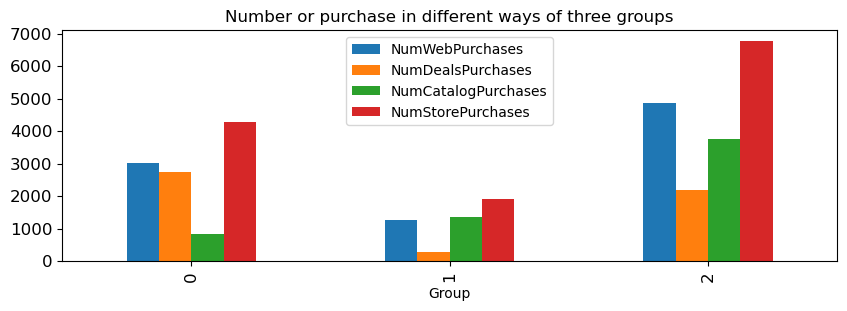

In [52]:
a=df_copy.groupby(['label'])['NumWebPurchases',"NumDealsPurchases","NumCatalogPurchases","NumStorePurchases"].sum().reset_index()
axes =a.plot.bar(x="label",y=['NumWebPurchases',"NumDealsPurchases","NumCatalogPurchases","NumStorePurchases"],
                title="Number or purchase in different ways of three groups",
                xlabel="Group",
                fontsize='large',figsize=(10,3))

None

Customer in group 3 prefered to purchase products at store than group 0 and group 1. This trend can also be seen for the number of purchases on website amd with catalog.

Customer in group 0 usually purchased when there were good deals for products, compared to other groups.



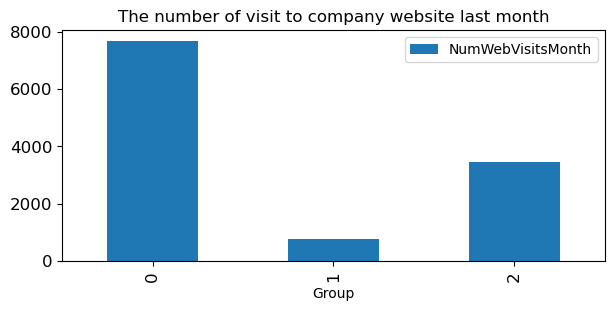

In [93]:
a=df_copy.groupby(['label'])["NumWebVisitsMonth"].sum().reset_index()
axes =a.plot.bar(x="label",y="NumWebVisitsMonth",
                title="The number of visit to company website last month",
                xlabel="Group",
                fontsize='large',figsize=(7,3))

In last month, group 0 customer spent more time to visit company's website than group 1 and group 2. Followed by group 2, but the number of visit is only a half of the group 0.

<AxesSubplot:xlabel='label'>

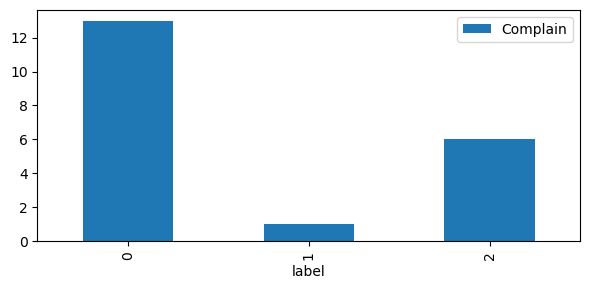

In [94]:
a=df_copy.groupby(['label'])['Complain'].sum().reset_index()
a.plot.bar(x="label",y="Complain",figsize=(7,3))

Customer in group 0 complained the most with 13 times, while customer in group 2 only comlained 6 times and 1 time for group 1

# Conlusion
In conclusion, after many steps of preparing dataset, we ran the k-mean method with number of clusters is 3. By our analysis on the new labeled dataset, we have some insights about the behavior of three customer groups . I will sumarize few characteristics of each group below.
## Group 0:
* Accounts for the majority of customer of the company.
* The average income, spending and number of purchase is the lowest in three groups.
* Customer in group 0 could be considered as the youngest age group.
* Most of customer has one or two children.
* Money spent on gold products is the second largest.
* Customer usually purchase when there are good deals.
* Complain the most.
## Group 1:
* The second largest group of customer.
* The average income and spending is the highest.
* The age distrubition dispersed  the most.
* Most of customer has no kid.
* Every customer has accepted the offer at least one campaign.
* Wine and meat are two common products.
* Number of purchases with the catalog is the second largest.
* Rarely visit the company's website last month.
## Group 2:
* Has the least customer in the group.
* The average of purchase is the higest in three groups.
* The average age is highest.
* Rarely accpeted any offer from the campaign.
* Spent most money on wine, and meet.
* The money spent on every product is higher than other two groups.
* The number of purchases at store is higher than group 0 and group 1.

By the information above, the company could have the better strategy to approach customer in each group; hence they could increase the revenue of company.